In [1]:
import umap
import matplotlib.pyplot as plt
import joblib
import numpy as np

In [2]:
with open(r'/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/active_learning_fixed_originalgroups.sav', 'rb') as fr:
    [X_train_list, Y_train_list,
     iterX_f1_scores_list, iterX_macro_scores_list, iterX_predict_prob_list,
     sampled_idx_list] = joblib.load(fr)
with open(r'/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/shuffled_train_data.sav', 'rb') as fr:
    [features_runlist, targets_runlist] = joblib.load(fr)

In [3]:
reducer = umap.UMAP(n_neighbors=60, n_components=2, min_dist=0.0, random_state=42)
it = 19
i = 5
# active samples
embeddings_active = reducer.fit_transform(X_train_list[it][i])
# random samples
total_counts_it = [len(np.where(Y_train_list[it][i]==b)[0]) for b in np.unique(Y_train_list[it][i])]
X_samp = []
Y_samp = []
for j in range(len(total_counts_it)):
    idx_b = np.where(targets_runlist[i] == j)[0]
    X_samp.append(features_runlist[i][idx_b[:total_counts_it[int(j)]]])
    Y_samp.append(targets_runlist[i][idx_b[:total_counts_it[int(j)]]])
X_samp_ = np.vstack(X_samp)
Y_samp_ = np.hstack(Y_samp)
reducer = umap.UMAP(n_neighbors=60, n_components=2, min_dist=0.0, random_state=42)
embeddings_random = reducer.fit_transform(X_samp_)

## plot random

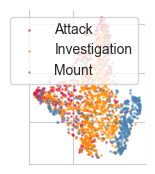

In [4]:
behavior_types = ['Attack', 'Investigation', 'Mount']
cmap_beh = ['crimson', 'darkorange', 'steelblue']
fig = plt.figure(figsize=(1.5, 2))
ax = fig.add_subplot()
for b in np.unique(Y_samp_):
    idx_b_embed = np.where(Y_samp_==int(b))[0]
    ax.scatter(embeddings_random[idx_b_embed, 0],
               embeddings_random[idx_b_embed, 1],
               s=1, alpha=0.5, c=cmap_beh[int(b)])
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
ax.legend(behavior_types)
plt.show()

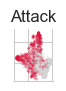

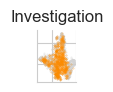

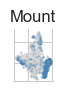

In [5]:
for b in np.unique(Y_samp_):
    fig, ax = plt.subplots(1, 1, figsize=(0.5, 0.67))
    idx_b_embed = np.where(Y_samp_==int(b))[0]
    idx_not_b = np.where(Y_samp_!=int(b))[0]
    ax.scatter(embeddings_random[idx_not_b, 0],
               embeddings_random[idx_not_b, 1],
               s=0.1, alpha=0.5, c='lightgray')
    ax.scatter(embeddings_random[idx_b_embed, 0],
               embeddings_random[idx_b_embed, 1],
               s=0.1, alpha=0.5, c=cmap_beh[int(b)])
    ax.set_title(behavior_types[int(b)])
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.show()

## plot active samples

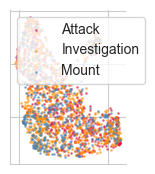

In [6]:
fig = plt.figure(figsize=(1.5, 2))
ax = fig.add_subplot()
for b in np.unique(Y_train_list[it][i]):
    idx_b_embed = np.where(Y_train_list[it][i]==int(b))[0]
    ax.scatter(embeddings_active[idx_b_embed, 0],
               embeddings_active[idx_b_embed, 1],
               s=1, alpha=0.5, c=cmap_beh[int(b)])
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
ax.legend(behavior_types)
plt.show()

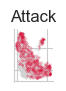

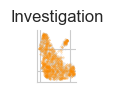

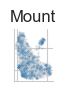

In [7]:
for b in np.unique(Y_samp_):
    fig, ax = plt.subplots(1, 1, figsize=(0.5, 0.67))
    idx_b_embed = np.where(Y_train_list[it][i]==int(b))[0]
    idx_not_b = np.where(Y_train_list[it][i]!=int(b))[0]
    ax.scatter(embeddings_active[idx_not_b, 0],
               embeddings_active[idx_not_b, 1],
               s=0.1, alpha=0.5, c='lightgray')
    ax.scatter(embeddings_active[idx_b_embed, 0],
               embeddings_active[idx_b_embed, 1],
               s=0.1, alpha=0.5, c=cmap_beh[int(b)])
    ax.set_title(behavior_types[int(b)])
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()